In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/costa-rican-household-poverty-prediction/train.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/test.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/train.csv
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/codebook.csv
/kaggle/input/costa-rican-household-poverty-prediction/codebook.xlsx
/kaggle/input/costa-rican-household-poverty-prediction/test.csv
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv


Extracting features with high covariance

In [84]:
pd.options.display.max_columns = 150
df=pd.read_csv('../input/costa-rican-household-poverty-prediction/train.csv')
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [85]:
df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [86]:
print('number of target variables ', df['Target'].unique())
print('number of data points ', len(df))
print('number of person data points' ,df['Id'].nunique())
print('number of unique identifier for each household',df['idhogar'].nunique())

number of target variables  [4 2 3 1]
number of data points  9557
number of person data points 9557
number of unique identifier for each household 2988


idhogar represents the total number of house id's

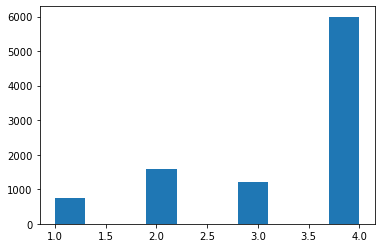

In [87]:
import matplotlib.pyplot as plt
plt.hist(df['Target'])
plt.show()

Extracting important features based on correlation metric. We will only consider correlation between target variable and other parameters

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [89]:
for column in df.columns:
    mode=df[column].mode()
    df[column]=df[column].fillna(mode)

df.isna().any()

Id                 False
v2a1                True
hacdor             False
rooms              False
hacapo             False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Target             False
Length: 143, dtype: bool

In [90]:
cordf=df.drop(['Target'],axis=1)

# Create correlation matrix
corr_matrix = cordf.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop.append('Id')

# Drop features 
cordf.drop(to_drop, axis=1, inplace=True)

In [91]:
print('number of column after removing highly correlated features ',len(cordf.columns))

number of column after removing highly correlated features  132


In [92]:
corr=df.corr().abs()
to_drop=[]
for column in cordf.columns:
    try:
        if(corr[column]['Target']<0.1):
            to_drop.append(column)
    except:
        print(column)
        to_drop.append(column)
cordf.drop(to_drop,axis=1,inplace=True)

idhogar
dependency
edjefe
edjefa


In [93]:
print('number of column after removing highly correlated features ',len(cordf.columns))
cordf.columns

number of column after removing highly correlated features  60


Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4m1', 'r4m3', 'r4t1', 'r4t3', 'tamviv', 'escolari', 'paredblolad',
       'paredmad', 'pisomoscer', 'pisocemento', 'pisonotiene', 'pisomadera',
       'cielorazo', 'sanitario5', 'energcocinar2', 'energcocinar4',
       'elimbasu1', 'elimbasu3', 'elimbasu5', 'epared1', 'epared2', 'epared3',
       'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3',
       'estadocivil1', 'estadocivil3', 'hogar_nin', 'hogar_adul', 'meaneduc',
       'instlevel1', 'instlevel2', 'instlevel8', 'bedrooms', 'overcrowding',
       'tipovivi2', 'tipovivi4', 'tipovivi5', 'computer', 'television',
       'mobilephone', 'qmobilephone', 'lugar1', 'age', 'SQBescolari',
       'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBmeaned'],
      dtype='object')

In [94]:
cordf.columns[cordf.isna().sum()!=0]

Index(['v2a1', 'meaneduc', 'SQBmeaned'], dtype='object')

In [95]:
cordf['v2a1']=cordf['v2a1'].fillna(0)
cordf['SQBmeaned']=cordf['SQBmeaned'].fillna(0)
cordf['meaneduc']=cordf['meaneduc'].fillna(0)

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(cordf,df['Target'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [97]:
clf.score(cordf,df['Target'])

0.8300721983886157

In [98]:
def prepare_data(df):
    print('number of data points ', len(df))
    print('number of person data points' ,df['Id'].nunique())
    print('number of unique identifier for each household',df['idhogar'].nunique())
    
    for column in df.columns:
        mode=df[column].mode()
        df[column]=df[column].fillna(mode)
    
    df['v2a1']=df['v2a1'].fillna(0)
    df['SQBmeaned']=df['SQBmeaned'].fillna(0)
    df['meaneduc']=df['meaneduc'].fillna(0)

    
    return df

In [99]:
x_train=pd.read_csv('../input/costa-rican-household-poverty-prediction/train.csv')
y_train=x_train['Target']

x_test=pd.read_csv('../input/costa-rican-household-poverty-prediction/test.csv')

print('train data')
x_train=prepare_data(x_train)
print('test data')
x_test=prepare_data(x_test)

x_train.drop(['Target','Id','idhogar','dependency','edjefe','edjefa'],axis=1,inplace=True)
x_test.drop(['Id','idhogar','dependency','edjefe','edjefa'],axis=1,inplace=True)

train data
number of data points  9557
number of person data points 9557
number of unique identifier for each household 2988
test data
number of data points  23856
number of person data points 23856
number of unique identifier for each household 7352


In [100]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 137 entries, v2a1 to agesq
dtypes: float64(8), int64(129)
memory usage: 10.0 MB


In [101]:
to_drop=x_train.columns[x_train.isna().any()].tolist()
x_train.drop(to_drop,axis=1,inplace=True)
x_test.drop(to_drop,axis=1,inplace=True)

In [102]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [103]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
print(clf.score(xtest,ytest))
print(accuracy_score(ytest,ypred))

0.7425491439441978
0.7425491439441978


In [105]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(xtrain)
ypred=kmeans.predict(xtest)
print(accuracy_score(ytest,ypred))

0.11953075459733671


In [106]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
ypred = gnb.fit(xtrain, ytrain).predict(xtest)
print(accuracy_score(ytest,ypred))

0.22986683576410907


Feature enginnering steps and EDA since we did not consider only numerical data,we will further clean and process data to extract features

In [107]:
df=pd.read_csv('../input/costa-rican-household-poverty-prediction/train.csv')
df.columns[df.dtypes==object]

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

id - unique identifier
idhogar - unique identifer of head of household
so we can ignore thest two features


dependency- This is an important feature but it is not clean but we have sqbdependency which is clean and we can extarct dependency from sqbdependency

edjefe, edjefa - years of education of head of household

# Data preprocessing

In [108]:
df['dependency']=np.sqrt(df['SQBdependency'])

In [109]:
df.columns[df.isna().sum()!=0]

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype='object')

Columns with null values

v2a1 - monthly rent

v18q1 - number of tablets

rez_esc - years behind school

meaneduc - mean education for adults

SQBmeaned - square of meaned

meaneduc and sqbmeaned are hight correlated

In [110]:
print('total  number of rows with meaneduc as null values ',len(df[df['meaneduc'].isnull()]))
print('total  number of rows with v2a1 as null values ',len(df[df['v2a1'].isnull()]))
print('total  number of rows with v18q1 as null values ',len(df[df['v18q1'].isnull()]))
print('total  number of rows with rez_esc as null values ',len(df[df['rez_esc'].isnull()]))
print('total  number of rows with SQBmeaned as null values ',len(df[df['SQBmeaned'].isnull()]))

total  number of rows with meaneduc as null values  5
total  number of rows with v2a1 as null values  6860
total  number of rows with v18q1 as null values  7342
total  number of rows with rez_esc as null values  7928
total  number of rows with SQBmeaned as null values  5


Handling v2a1 values as there are lot of null values, so we can see whther all these people own there house

In [111]:
norent=df[df['v2a1'].isnull()]
print("Owns his house:", norent[norent['tipovivi1']==1]['Id'].count())
print("Owns his house paying installments", norent[norent['tipovivi2']==1]['Id'].count())
print("Precarious ", norent[norent['tipovivi4']==1]['Id'].count())
print("Other ", norent[norent['tipovivi5']==1]['Id'].count())
print("Total ", 6860)

Owns his house: 5911
Owns his house paying installments 0
Precarious  163
Other  786
Total  6860


In [112]:
df['v2a1']=df['v2a1'].fillna(0)

Now lets look at v18q1- Number of tablets

In [113]:
print('total  number of rows with v18q1 as null values ',len(df[df['v18q1'].isnull()]))

total  number of rows with v18q1 as null values  7342


we have v18q which indicates whteher there is a teblet in the household or not

In [114]:
tabletnan=df[df['v18q1'].isnull()]
tabletnan[tabletnan['v18q']==0]['Id'].count()

7342

In [115]:
df['v18q1']=df['v18q1'].fillna(0)

lets look at rez_esc which indicates the number of years a person is behind school

In [116]:
print(df['rez_esc'].isnull().sum())
df['rez_esc']=df['rez_esc'].fillna(0)

7928


In [117]:
df.columns[df.isna().sum()!=0]

Index(['meaneduc', 'SQBmeaned'], dtype='object')

In [118]:
meaned=df[df['meaneduc'].isnull()]
meaned[['meaneduc','SQBmeaned']]

,meaneduc,SQBmeaned
1291,NaN,NaN
1840,NaN,NaN
1841,NaN,NaN
2049,NaN,NaN
2050,NaN,NaN


In [119]:
df['meaneduc']=df['meaneduc'].fillna(0)
df.drop(['SQBmeaned'],axis=1,inplace=True)

In [120]:
df.columns[df.isna().sum()!=0]

Index([], dtype='object')

# EDA on data

Most of the features are related to each other like :-

* v14a, =1 has bathroom in the household
* refrig, =1 if the household has refrigerator
* v18q, owns a tablet
* v18q1, number of tablets household owns

so we will explore only one feature of each category

v2a1 - Monthly rent payment 

(array([9.049e+03, 3.900e+02, 9.100e+01, 1.800e+01, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([      0. ,  235347.7,  470695.4,  706043.1,  941390.8, 1176738.5,
        1412086.2, 1647433.9, 1882781.6, 2118129.3, 2353477. ]),
 <a list of 10 Patch objects>)

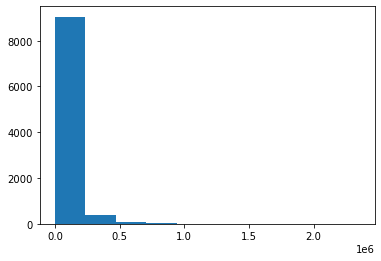

In [121]:
plt.hist(df['v2a1'])

* tamhog, size of the household
* tamviv, number of persons living in the household

as the size of household increases the nuumber of persons living in the house also increased


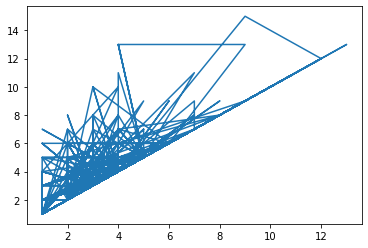

In [122]:
plt.plot(df['tamhog'],df['tamviv'])
print('as the size of household increases the nuumber of persons living in the house also increased')

* abastaguadentro, =1 if water provision inside the dwelling
* abastaguafuera, =1 if water provision outside the dwelling
* abastaguano, =1 if no water provision

In [123]:
print('water provision inside the dwelling ', df['abastaguadentro'].sum())
print('water provision outside the dwelling ', df['abastaguafuera'].sum())
print('no water provision ', df['abastaguano'].sum())

water provision inside the dwelling  9220
water provision outside the dwelling  303
no water provision  34


mean poverty level of households for water provision inside the dwelling  3.3155097613882862


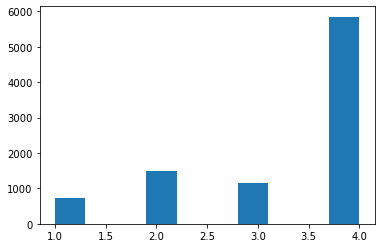

In [124]:
abastaguadentro=df[df['abastaguadentro']==1]
print('mean poverty level of households for water provision inside the dwelling ',abastaguadentro['Target'].mean())
plt.hist(abastaguadentro['Target'])
plt.show()

mean poverty level of households for water provision outside the dwelling  3.01980198019802


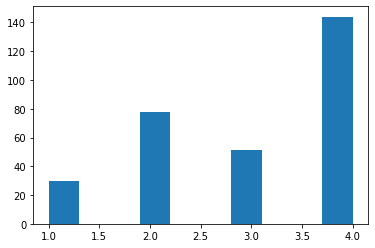

In [125]:
abastaguafuera=df[df['abastaguafuera']==1]
print('mean poverty level of households for water provision outside the dwelling ',abastaguafuera['Target'].mean())
plt.hist(abastaguafuera['Target'])
plt.show()

mean poverty level of households no water provision   2.235294117647059


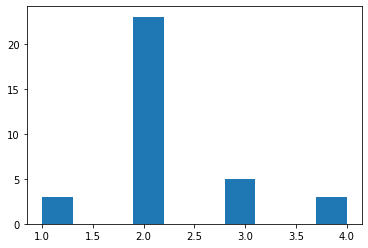

In [126]:
abastaguano=df[df['abastaguano']==1]
print('mean poverty level of households no water provision  ',abastaguano['Target'].mean())
plt.hist(abastaguano['Target'])
plt.show()

* public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
* planpri, =1 electricity from private plant
* noelec, =1 no electricity in the dwelling
* coopele, =1 electricity from cooperative

In [127]:
print('electricity from CNFL, ICE, ESPH/JASEC', df['public'].sum())
print('electricity from private plant', df['planpri'].sum())
print('no electricity in the dwelling', df['noelec'].sum())
print('electricity from cooperative', df['coopele'].sum())

electricity from CNFL, ICE, ESPH/JASEC 8459
electricity from private plant 3
no electricity in the dwelling 21
electricity from cooperative 1059


electricity from CNFL, ICE, ESPH/JASEC 3.305591677503251


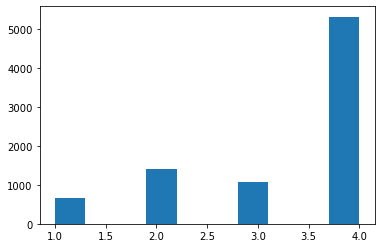

In [128]:
public=df[df['public']==1]
print('electricity from CNFL, ICE, ESPH/JASEC',public['Target'].mean())
plt.hist(public['Target'])
plt.show()

no electricity in the dwelling 2.5714285714285716


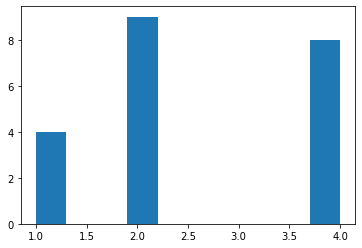

In [129]:
noelec=df[df['noelec']==1]
print('no electricity in the dwelling',noelec['Target'].mean())
plt.hist(noelec['Target'])
plt.show()

electricity from cooperative 3.308781869688385


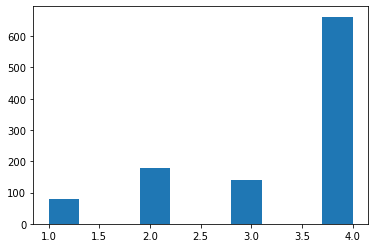

In [130]:
coopele=df[df['coopele']==1]
print('electricity from cooperative',coopele['Target'].mean())
plt.hist(coopele['Target'])
plt.show()

1. sanitario1, =1 no toilet in the dwelling
1. sanitario2, =1 toilet connected to sewer or cesspool
1. sanitario3, =1 toilet connected to  septic tank
1. sanitario5, =1 toilet connected to black hole 
1. sanitario6, =1 toilet connected to other system

In [131]:
print('no toilet in the dwelling', df['sanitario1'].sum())
print('toilet connected to sewer or cesspool', df['sanitario2'].sum())
print('toilet connected to septic tank', df['sanitario3'].sum())
print('toilet connected to black hole ', df['sanitario5'].sum())
print('toilet connected to other system', df['sanitario6'].sum())

no toilet in the dwelling 37
toilet connected to sewer or cesspool 2045
toilet connected to septic tank 7304
toilet connected to black hole  147
toilet connected to other system 24


no toilet in the dwelling 2.5405405405405403


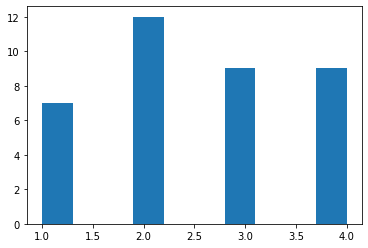

In [132]:
sanitario1=df[df['sanitario1']==1]
print('no toilet in the dwelling',sanitario1['Target'].mean())
plt.hist(sanitario1['Target'])
plt.show()

toilet connected to sewer or cesspool 3.473838630806846


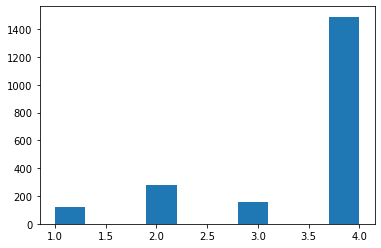

In [133]:
sanitario2=df[df['sanitario2']==1]
print('toilet connected to sewer or cesspool',sanitario2['Target'].mean())
plt.hist(sanitario2['Target'])
plt.show()

toilet connected to septic tank 3.276423877327492


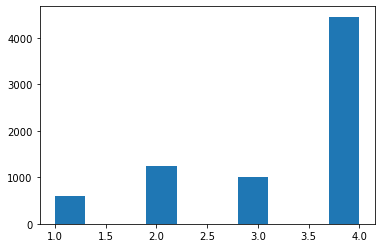

In [134]:
sanitario3=df[df['sanitario3']==1]
print('toilet connected to septic tank',sanitario3['Target'].mean())
plt.hist(sanitario3['Target'])
plt.show()

toilet connected to black hole 2.435374149659864


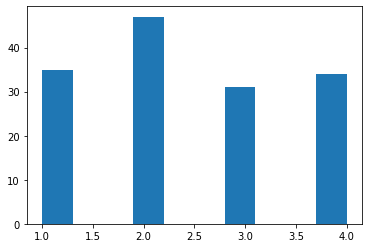

In [135]:
sanitario5=df[df['sanitario5']==1]
print('toilet connected to black hole',sanitario5['Target'].mean())
plt.hist(sanitario5['Target'])
plt.show()

toilet connected to other system 3.0416666666666665


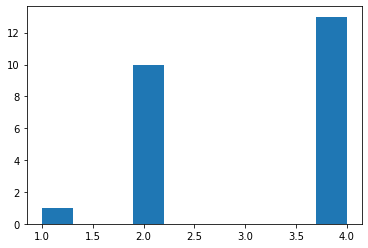

In [136]:
sanitario6=df[df['sanitario6']==1]
print('toilet connected to other system',sanitario6['Target'].mean())
plt.hist(sanitario6['Target'])
plt.show()

* energcocinar1, =1 no main source of energy used for cooking (no kitchen)
* energcocinar2, =1 main source of energy used for cooking electricity
* energcocinar3, =1 main source of energy used for cooking gas
* energcocinar4, =1 main source of energy used for cooking wood charcoal

In [137]:
print('no main source of energy used for cooking', df['energcocinar1'].sum())
print('main source of energy used for cooking electricity', df['energcocinar2'].sum())
print('main source of energy used for cooking gas', df['energcocinar3'].sum())
print('main source of energy used for cooking wood charcoal', df['energcocinar4'].sum())

no main source of energy used for cooking 18
main source of energy used for cooking electricity 4679
main source of energy used for cooking gas 4381
main source of energy used for cooking wood charcoal 479


no main source of energy used for cooking  2.3333333333333335


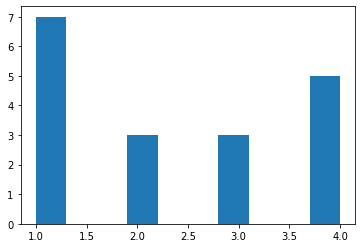

In [138]:
energcocinar1=df[df['energcocinar1']==1]
print('no main source of energy used for cooking ',energcocinar1['Target'].mean())
plt.hist(energcocinar1['Target'])
plt.show()

main source of energy used for cooking electricity  3.4635605898696302


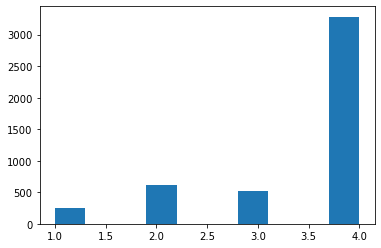

In [139]:
energcocinar2=df[df['energcocinar2']==1]
print('main source of energy used for cooking electricity ',energcocinar2['Target'].mean())
plt.hist(energcocinar2['Target'])
plt.show()

main source of energy used for cooking gas 3.212052042912577


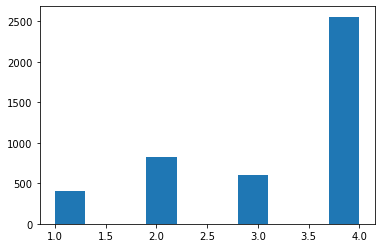

In [140]:
energcocinar3=df[df['energcocinar3']==1]
print('main source of energy used for cooking gas',energcocinar3['Target'].mean())
plt.hist(energcocinar3['Target'])
plt.show()

main source of energy used for cooking wood charcoal 2.5887265135699375


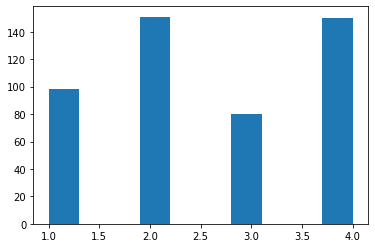

In [141]:
energcocinar4=df[df['energcocinar4']==1]
print('main source of energy used for cooking wood charcoal',energcocinar4['Target'].mean())
plt.hist(energcocinar4['Target'])
plt.show()

* epared1, =1 if walls are bad
* epared2, =1 if walls are regular
* epared3, =1 if walls are good

In [142]:
def plot_graph(columns):
    fig,axis=plt.subplots(1,3,figsize=(15,5))
    for column in range(len(columns)):
        gdf=df[df[columns[column]]==1]
        print(columns[column]," ",gdf['Target'].mean())
        axis[column].hist(gdf['Target'])
    plt.show()

epared1   2.695607763023493
epared2   3.045701502077341
epared3   3.5586346118553864


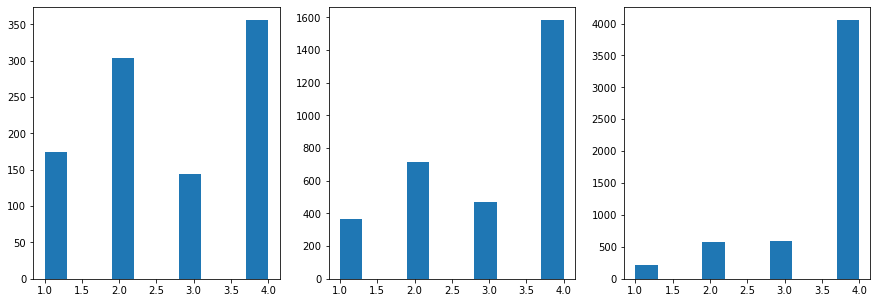

In [143]:
columns=['epared1','epared2','epared3']
plot_graph(columns)

* etecho1, =1 if roof are bad
* etecho2, =1 if roof are regular
* etecho3, =1 if roof are good

etecho1   2.800325998370008
etecho2   3.0813657827824192
etecho3   3.521785906401291


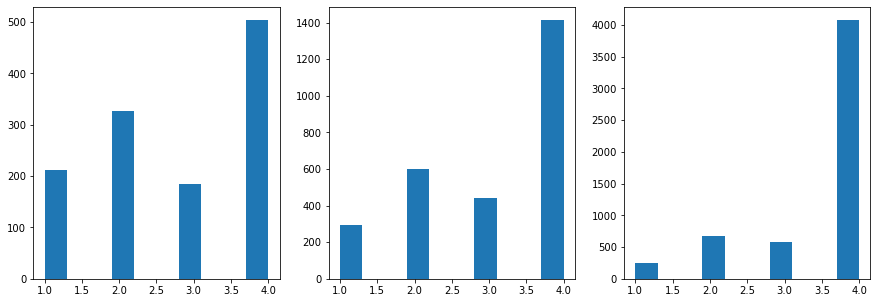

In [144]:
columns=['etecho1','etecho2','etecho3']
plot_graph(columns)

In [145]:
x_train=df.drop(['Id', 'idhogar', 'Target', 'edjefe', 'edjefa'], axis=1)
y_train=df['Target']

* lugar1, =1 region Central
* lugar2, =1 region Chorotega
* lugar3, =1 region PacÃƒÂ­fico central
* lugar4, =1 region Brunca
* lugar5, =1 region Huetar AtlÃƒÂ¡ntica
* lugar6, =1 region Huetar Norte
* area1, =1 zona urbana
* area2, =2 zona rural

KeyError: 'lugar1'

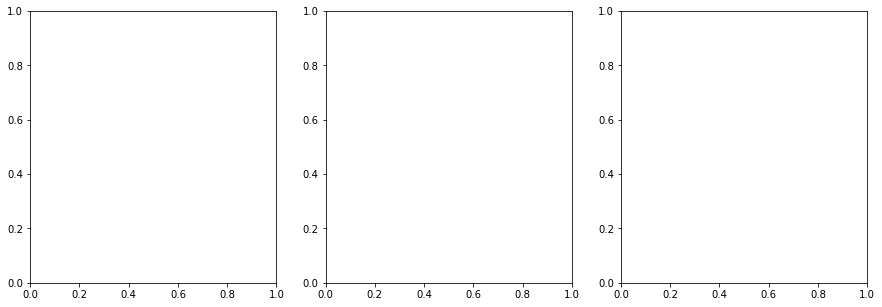

In [171]:
columns=['lugar1','lugar2','lugar3']
plot_graph(columns)

In [ ]:
columns=['lugar4','lugar5','lugar6']
plot_graph(columns)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params={'n_estimators': list(range(40,61, 1))}
rfs = GridSearchCV(clf, params, cv=5)
rfs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 41, 42, 43, 44, 45, 46, 47, 48,
                                          49, 50, 51, 52, 53, 54, 55, 56, 57,
                                          58, 59, 60]})

In [147]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [148]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
print(accuracy_score(ytest,ypred))

0.7409638554216867


In [149]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[  85   43    8  128]
 [   1  253   17  253]
 [   5   35   89  293]
 [   1   29    4 1910]]


In [150]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.92      0.32      0.48       264
           2       0.70      0.48      0.57       524
           3       0.75      0.21      0.33       422
           4       0.74      0.98      0.84      1944

    accuracy                           0.74      3154
   macro avg       0.78      0.50      0.56      3154
weighted avg       0.75      0.74      0.70      3154



In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [152]:
clf = RandomForestClassifier()
params={'n_estimators': list(range(40,61, 1))}
gs = GridSearchCV(clf, params, cv=5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 41, 42, 43, 44, 45, 46, 47, 48,
                                          49, 50, 51, 52, 53, 54, 55, 56, 57,
                                          58, 59, 60]})

In [153]:
ypred=gs.predict(xtest)

In [154]:
print(confusion_matrix(ytest, ypred))

[[ 264    0    0    0]
 [   0  524    0    0]
 [   0    0  422    0]
 [   0    0    0 1944]]


In [155]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       524
           3       1.00      1.00      1.00       422
           4       1.00      1.00      1.00      1944

    accuracy                           1.00      3154
   macro avg       1.00      1.00      1.00      3154
weighted avg       1.00      1.00      1.00      3154



In [156]:
test=pd.read_csv('../input/costa-rican-household-poverty-prediction/test.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [157]:
test['dependency']=np.sqrt(test['SQBdependency'])
test['v2a1']=test['v2a1'].fillna(0)
test['v18q1']=test['v18q1'].fillna(0)
test.drop(['SQBmeaned'],axis=1,inplace=True)
test['rez_esc']=test['rez_esc'].fillna(0)

In [158]:
xtest=test.drop(['Id','idhogar','edjefe', 'edjefa'], axis=1)
xtest['meaneduc']=xtest['meaneduc'].fillna(0)

In [159]:
xtest.shape

(23856, 137)

In [160]:
xtest.columns[xtest.isna().sum()!=0]

Index([], dtype='object')

In [161]:
ypred=rfs.predict(xtest)

In [162]:
from pandas import DataFrame
df = DataFrame ()

In [163]:
df['Id']=test['Id']
df['Target']=ypred.reshape(-1,)

In [164]:
df.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [170]:
df.to_csv('submission.csv',index=False)